# Linear Regression

In this experiment, we use simple linear regression to estimate the relationship between Years of Experience and Salary by getting the best fit line.

In [52]:
# Import necessary libraries
import pandas as pd
import torch
from matplotlib import pyplot
from argparse import ArgumentParser

We prepare the data and display it for our reference. In order to use the dataset, download the CSV file from [Kaggle](https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset) and save it to a subfolder called 'Datasets'. 

In [53]:
df = pd.read_csv('Datasets/Salary_Data.csv')
display(df)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Then, we extract the $x$ (Years of Experience), $y$ (Salary), and $n$ (Number of datapoints) values from the pandas dataframe.

In [54]:
x = torch.tensor(df.iloc[0:,0].values)
y = torch.tensor(df.iloc[0:,1].values)
n = df.count(axis=0)[0]

##### Using least squares

We solve for the weight/slope and bias using the least squares method. We used [The Organic Chemistry Tutor](https://www.youtube.com/watch?v=P8hT5nDai6A) as reference for the solution.

In [55]:
ex = sum(x) # Summation of X
ey = sum(y) # Summation of Y
exy = sum(x*y) # Summation of X*Y
ex2 = sum(x*x) # Summation of X^2

w = (n*exy - ex*ey)/(n*ex2 - (ex*ex)) # Slope formula
print(f'Weight/Slope: {w:.3f}')
b = (ey - w*ex)/n # Bias formula
print(f'Bias: {b:.3f}')

Weight/Slope: 9449.962
Bias: 25792.200


After getting the needed values, we plot the actual data points with the line of best fit.

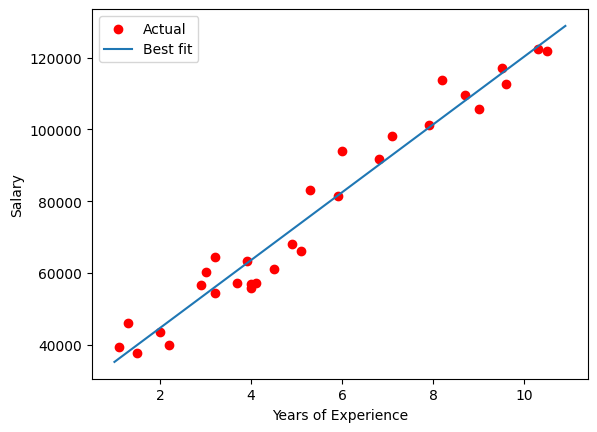

In [57]:
pyplot.scatter(x, y, label='Actual', color='red')

x1 = torch.arange(1, 11, 0.3)
y1 = w*x1 + b
pyplot.plot(x1, y1,label='Best fit')

pyplot.xlabel("Years of Experience")
pyplot.ylabel("Salary")
pyplot.legend()
pyplot.show()

Let us check if the obtained weight and bias terms are similar to when we use scikit-learn's LinearRegression() method. As observed, we have obtained the same values from both methods.

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
print(f'Weight/Slope: {lr.coef_[0]:.3f}')
print(f'Bias: {lr.intercept_:.3f}')

Weight/Slope: 9449.962
Bias: 25792.200


##### Using Gradient Descent
Aside from using the least squares method, we can also look for the weight/slope and bias values through gradient descent. To have a deeper understanding of the mathematics and the intuition behind this method, the [Linear Regression Lecture](https://www.youtube.com/watch?v=4b4MUYve_U8) by Andrew Ng is a great reference. The next code block defines the functions to be used for the algorithm. $h$ returns the linear equation, $J$ is used to compute for the cost function, $d0$ and $d1$ are used to compute for the partial derivatives for the gradient descent, while $gd$ updates the weight/slope and bias terms.

In [59]:
class SimpleLinearRegression():
    def __init__(self, t0, t1, lr, epochs):
        self.t0 = t0
        self.t1 = t1
        self.lr = lr
        self.epochs = epochs
        self.costs = []

    def h(self, x):
        return self.t1*x + self.t0

    def J(self, x, y, m):
        return sum((self.h(x) - y)**2)/(2*m)

    def d0(self, x, y, m):
        return sum(self.h(x) - y)/m

    def d1(self, x, y, m):
        return sum((self.h(x) - y)*x)/m

    def gd(self, x, y, m):
        temp0 = self.t0 - self.lr*self.d0(x, y, m)
        temp1 = self.t1 - self.lr*self.d1(x, y, m)
        return temp0, temp1
    
    def fit(self, x, y, m):
        print(f'Number of Epochs: {self.epochs}')
        for epoch in range(self.epochs):
            cost = self.J(x, y, m)
            self.costs.append([cost, epoch])
            if epoch % (self.epochs//10) == 0 or epoch == (self.epochs-1):
                print(f'Epoch {epoch}:')
                print(f'w = {self.t1:.3f}', end = ' | ')
                print(f'b = {self.t0:.3f}', end = ' | ')
                print(f'Cost = {cost:.3f}')
            self.t0, self.t1 = self.gd(x, y, m)

    def wb(self):
        return self.t0, self.t1

We first initialize the weight ($t1$) and bias ($t0$) values and define the number of epochs ($epochs$) and the learning rate ($lr$) by setting up the arguments.

In [60]:
def get_args():
    parser = ArgumentParser(description="Simple Linear Regression")
    parser.add_argument("--epochs", type=int, default=2000, help="num epochs")
    parser.add_argument("--lr", type=float, default=0.05, help="learning rate")
    parser.add_argument("--t0", type=int, default=0., help="initial value for t0 (bias)")
    parser.add_argument("--t1", type=float, default=1., help="initial value for t1 (weight/slope)")

    args = parser.parse_args("")
    return args

Finally, we perform the training to find for the weight/slope and bias values.  We log the new values along with the cost at every hundredth epoch and at the last epoch. If we observe the cost value, it gradually decreases as we train our regression model. Moreover, the final weight and bias values are similar to the values obtained from using the least squares method and when using scikit-learn's LinearRegression() function.

In [61]:
if __name__ == "__main__":
    args = get_args()
    m = n
    
    # Initialize the linear regression model
    slr = SimpleLinearRegression(args.t0, args.t1, args.lr, args.epochs)
    slr.fit(x,y,m)

    # Return the weight/slope and bias values from the trained model
    t0, t1 = slr.wb()
    print(f'\nWeight/Slope: {t1:.3f}\nBias: {t0:.3f}')

Number of Epochs: 2000
Epoch 0:
w = 1.000 | b = 0.000 | Cost = 3251000254.675
Epoch 200:
w = 9872.287 | b = 22946.268 | Cost = 16510938.805
Epoch 400:
w = 9500.326 | b = 25452.812 | Cost = 15647926.241
Epoch 600:
w = 9455.968 | b = 25751.727 | Cost = 15635652.924
Epoch 800:
w = 9450.679 | b = 25787.374 | Cost = 15635478.379
Epoch 1000:
w = 9450.048 | b = 25791.625 | Cost = 15635475.897
Epoch 1200:
w = 9449.973 | b = 25792.132 | Cost = 15635475.862
Epoch 1400:
w = 9449.964 | b = 25792.192 | Cost = 15635475.861
Epoch 1600:
w = 9449.962 | b = 25792.199 | Cost = 15635475.861
Epoch 1800:
w = 9449.962 | b = 25792.200 | Cost = 15635475.861
Epoch 1999:
w = 9449.962 | b = 25792.200 | Cost = 15635475.861

Weight/Slope: 9449.962
Bias: 25792.200


Although we observe similar parameter values for all methods, one possible area of concern is the observed high cost value during gradient descent. It is important to note that since we are performing linear regression on continuous variables, the calculated cost is bound to be high since the predicted value will most likely not match the actual value (while we also square the error between the predicted and actual values). What linear regression does is it determines the line that will best-fit the data, but unlike classification algorithms (e.g. logistic regression), it will likely not provide the most accurate answer especially if the data does not exactly fit in a straight line. However, if we plot the cost over the number of epochs, we see that the cost value continuously decreases and converges at a certain point during training, which is also observed with the parameters as they converge at around the same time as seen in the previous code block's output. 

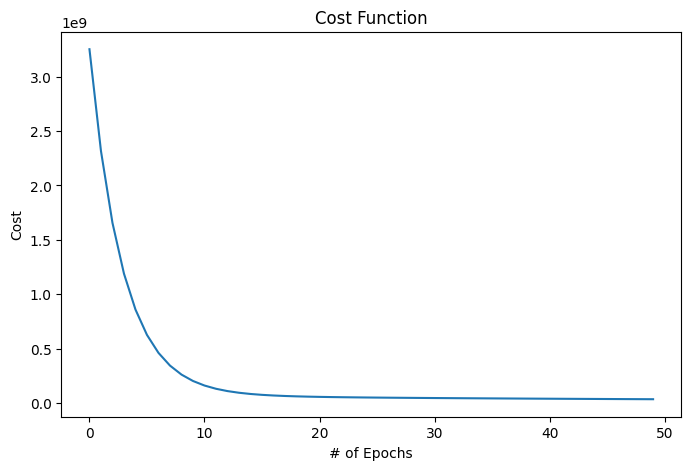

In [62]:
costs = torch.tensor(slr.costs)
fig = pyplot.figure(figsize=(8, 5))
fig.add_subplot(1, 1, 1)
pyplot.plot(costs[:50,1], costs[:50,0])

pyplot.xlabel("# of Epochs")
pyplot.ylabel("Cost")
pyplot.title('Cost Function')
pyplot.show()